In [1]:
#pip install scipy

## Application de regression linéaire

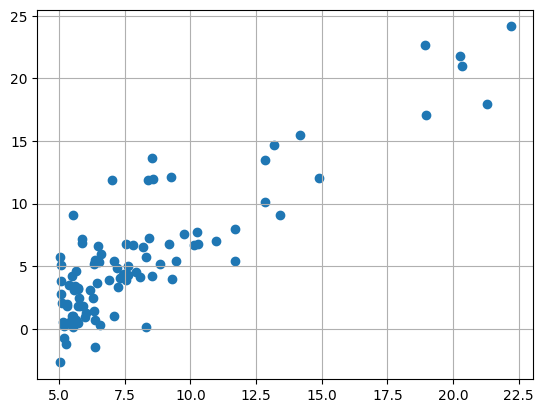

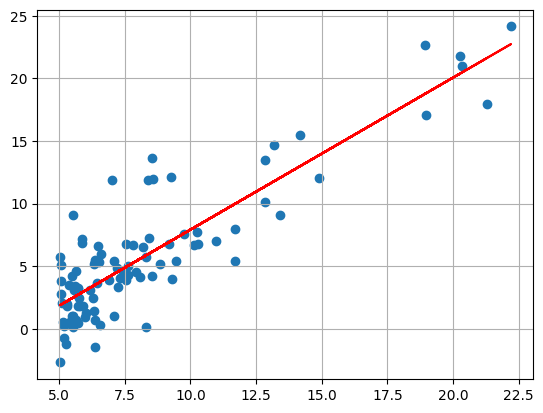

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv('univariate_linear_regression_dataset.csv')
X = df.iloc[:,0]
Y = df.iloc[:,1]
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.show()
SL=stats.linregress(X,Y)
slope=SL.slope; intercept=SL.intercept; coef_correlation=SL.rvalue
def predict(x):
    return slope * x + intercept
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
fitLine = predict(X)
plt.plot(X, fitLine, c='r')
plt.show()

In [18]:
slope

1.2135472539083587

In [19]:
intercept

-4.211504005424093

In [20]:
 coef_correlation

0.8721572919685905

In [21]:
# Prédiction pour x = 22.5
x_estimation = 22.5
estimation_y = predict(x_estimation)
print("Estimation pour x =", x_estimation, ":", estimation_y)

Estimation pour x = 22.5 : 23.09330920751398


## Application de regression linéaire

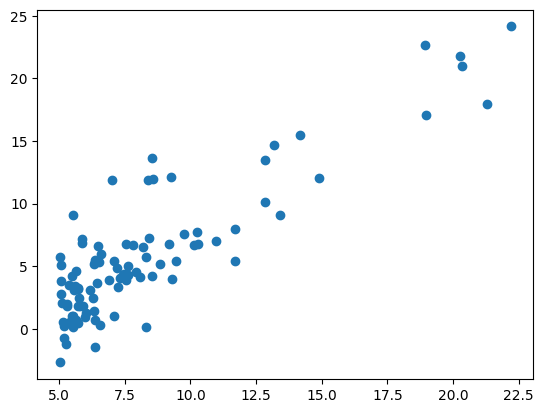

[[0.477993  ]
 [0.89049001]]
[[ 1.21354725]
 [-4.21150401]]


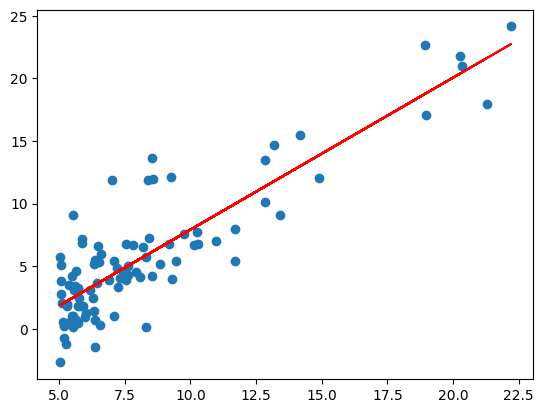

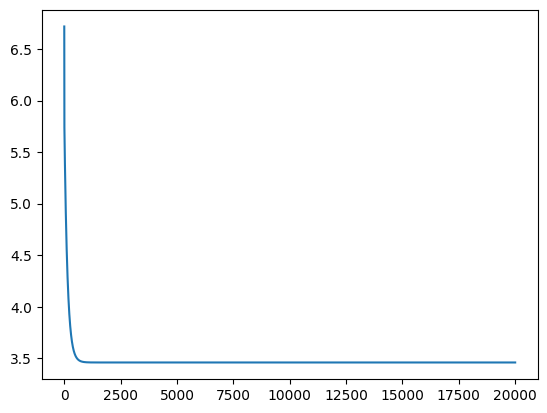

[-19.02173085]


In [51]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('univariate_linear_regression_dataset.csv')
x= df.iloc[:,0]; n_samples = len(x); x=np.array(x).reshape((n_samples, 1)) #96
y= df.iloc[:,1]; y=np.array(y).reshape((n_samples, 1))
x=np.array(x).reshape((n_samples, 1)) 
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée
plt.show()
# ajout de la colonne de biais a X
X = np.hstack((x, np.ones(x.shape)))
# création d'un vecteur parametre theta
theta = np.random.randn(2,1)
print(theta)
def f(X, theta):
    return X.dot(theta)
def erreur_somme_des_distances(X, y, theta):
    m = len(y)
    return (1/(2*m))*np.sum((f(X, theta)-y)**2)
def gradient(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(f(X, theta) - y)
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    # création d'un tableau de stockage pour enregistrer l'évolution des erreurs
    historique_des_erreurs = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * gradient(X, y, theta) # mise a jour du theta
        historique_des_erreurs[i] = erreur_somme_des_distances(X, y, theta)
    return theta, historique_des_erreurs
# Example de test :
n_iterations = 20000
learning_rate = 0.02 # modifier pour voir l'effet
theta_final, historique_des_erreurs=gradient_descent(X, y, theta, learning_rate, n_iterations) 
print(theta_final) # theta une fois que la machine a été entrainée 
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = f(X, theta_final)
# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')
plt.show()
plt.figure()
plt.plot(range(n_iterations), historique_des_erreurs)
plt.show()
print(f(np.array([22.5,11]),theta_final))

## Application de regression polynomiale

(-3.45*X^0)+(1.84*X^1)+(-0.04*X^2)+

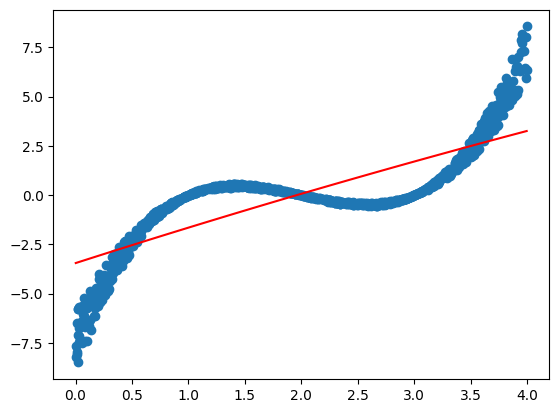

In [58]:
def afficher_pol(LPol):
    L=LPol[:]; L.reverse()
    L=[round(e,2) for e in L]
    for i in range(len(L)):
        print('('+str(L[i])+'*X^'+str(i)+')',end='+')
def Evaluer_pol(LPol,x):
    s=0
    L=LPol[:]
    L.reverse()
    for i in range(len(LPol)):
        s+=L[i]*(x**i)
    return(s)
import numpy as np
import matplotlib.pyplot as plt 
import pandas
data=pandas.read_csv('dataset_polynomial3.csv').values
x=data[1:1001,0]
y=data[1:1001,1]
degre_polynome=2
p= np.poly1d(np.polyfit(x, y,degre_polynome))
LPol=list(p)
afficher_pol(LPol)
les_x= np.linspace(min(x), max(x), 100)
plt.scatter(x, y)
plt.plot(les_x, p(les_x), c='r')
plt.show()